# 💘 Girlfriend Acquisition Predictor V3 - Advanced Model

Welcome to **Version 3** of the *Girlfriend Acquisition Predictor*!  
This notebook pushes beyond basic behavioral features to include a wider spectrum of **social, academic, and environmental context variables** — creating a more **realistic and nuanced** predictive model.

---

## 🔍 What's New in V3?

Unlike the earlier versions, this notebook incorporates:

- 🌟 **Expanded Feature Set**: Includes communication skills, grooming habits, CGPA, participation in hackathons, DMs per week, and whether the target is single.
- 🧠 **Smarter Logic**: Uses a refined scoring mechanism to simulate real-world social dynamics.
- ⚠️ **Real-World Constraints**: For example, if the target is not single, prediction likelihood plummets — regardless of other factors.

---

## 🧪 What We’ll Cover

1. **Importing Libraries**  
   Bring in all the necessary packages for data manipulation, machine learning, and visualization.

2. **Data Generation Function (V3)**  
   Use a custom `generate_synthetic_data_v3()` function to create a synthetic dataset with realistic behaviors and constraints.

3. **Inspecting the Dataset**  
   Preview a few rows to understand what kind of data we're working with.

4. **Preprocessing & Train-Test Split**  
   Prepare data for model training by scaling features and creating training and testing sets.

5. **Model Training**  
   Train a `LogisticRegression` model on the V3 data.

6. **Evaluation**  
   Evaluate model performance using accuracy, classification report, and a confusion matrix.

7. **The Abhin Simulator (V3)**  
   Try out your own feature values and simulate whether the model predicts a favorable outcome!

8. **EDA & Feature Insights**  
   Visualize feature relationships with a correlation heatmap to understand which variables impact the prediction most.

---

> ⚙️ This version is ideal for fun experimentation and also demonstrates how real-life features and constraints can be incorporated into ML modeling.


In [24]:
# 📦 Cell 1: Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import warnings

warnings.filterwarnings('ignore')
sns.set_style("whitegrid")


In [25]:
# 🧠 Cell 2: Data Generation Function (V3)

def generate_synthetic_data_v3(num_samples=2000): # Increased sample size for more features
    """
    Generates an advanced synthetic dataset with nuanced social and environmental features.
    """
    # --- Kept Features ---
    events_attended = np.random.randint(0, 30, size=num_samples)
    reply_rate = np.random.uniform(0.05, 0.95, size=num_samples)
    dept_similarity_index = np.random.randint(0, 2, size=num_samples)
    friend_zone_flag = np.random.randint(0, 2, size=num_samples)
    crush_eye_contact_count = np.random.choice([0, 1, 2, 3, 4, 5], size=num_samples, p=[0.75, 0.1, 0.08, 0.04, 0.02, 0.01])
    communication_skill_score = np.random.uniform(2, 10, size=num_samples)

    # --- New & Advanced Features (V3) ---
    personal_grooming_score = np.random.uniform(3, 10, size=num_samples) # Replaces wrinkle_score
    semester_cgpa = np.random.uniform(7.5, 9.8, size=num_samples)
    hackathon_participation_count = np.random.choice([0, 1, 2, 3, 4], size=num_samples, p=[0.5, 0.3, 0.1, 0.05, 0.05])
    other_competition_wins = np.random.choice([0, 1, 2], size=num_samples, p=[0.8, 0.15, 0.05])
    avg_dm_conversations_per_week = np.random.randint(0, 15, size=num_samples)
    provides_academic_help = np.random.randint(0, 2, size=num_samples)
    target_is_single = np.random.choice([0, 1], size=num_samples, p=[0.3, 0.7]) # 30% chance target is not single
    local_competition_score = np.random.uniform(1, 10, size=num_samples) # 1-10 scale

    # --- Target Variable Logic (The "Secret Sauce" V3) ---
    score = (
        (events_attended * 0.06) + (reply_rate * 1.5) + (crush_eye_contact_count * 0.3) +
        (communication_skill_score * 0.25) + (personal_grooming_score * 0.2) +
        (provides_academic_help * 0.5) + (hackathon_participation_count * 0.2) +
        (other_competition_wins * 0.4) + (avg_dm_conversations_per_week * 0.1) +
        (np.abs(semester_cgpa - 8.8) * -0.3) - (friend_zone_flag * 4.0) -
        (local_competition_score * 0.2)
    )

    # The "Game-Changer" Constraint: If the target is not single, the chance plummets.
    score[target_is_single == 0] -= 10

    probability = 1 / (1 + np.exp(-score))
    girlfriend_status = (probability > np.random.uniform(0.4, 1, size=num_samples)).astype(int)

    # Ensure the constraint holds true in the final data
    girlfriend_status[target_is_single == 0] = 0

    # Create DataFrame
    df = pd.DataFrame({
        'events_attended': events_attended, 'reply_rate': reply_rate,
        'dept_similarity_index': dept_similarity_index, 'friend_zone_flag': friend_zone_flag,
        'crush_eye_contact_count': crush_eye_contact_count, 'communication_skill_score': communication_skill_score,
        'personal_grooming_score': personal_grooming_score, 'semester_cgpa': semester_cgpa,
        'hackathon_participation_count': hackathon_participation_count, 'other_competition_wins': other_competition_wins,
        'avg_dm_conversations_per_week': avg_dm_conversations_per_week, 'provides_academic_help': provides_academic_help,
        'target_is_single': target_is_single, 'local_competition_score': local_competition_score,
        'girlfriend_status': girlfriend_status
    })
    return df


In [26]:
# 🧾 Cell 3: Generate Data and Inspect Head

df_v3 = generate_synthetic_data_v3()
print("--- V3 Dataset Head ---")
df_v3.head()


--- V3 Dataset Head ---


,events_attended,reply_rate,dept_similarity_index,friend_zone_flag,crush_eye_contact_count,communication_skill_score,personal_grooming_score,semester_cgpa,hackathon_participation_count,other_competition_wins,avg_dm_conversations_per_week,provides_academic_help,target_is_single,local_competition_score,girlfriend_status
0,6,0.801413,0,0,5,9.526480,4.079192,8.609460,0,0,1,1,1,9.002864,1
1,0,0.727324,1,1,1,7.085613,5.599641,9.344257,2,1,7,1,1,1.873435,1
2,25,0.275315,1,1,0,7.512434,6.177107,9.394268,0,0,11,0,0,7.214827,0
3,23,0.534396,0,0,0,2.103458,5.263930,9.245262,1,0,4,0,1,6.360718,1
4,28,0.428176,1,1,4,9.478260,9.042111,9.319372,1,2,1,0,1,7.138007,1


from matplotlib import pyplot as plt
_df_16['events_attended'].plot(kind='hist', bins=20, title='events_attended')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_17['reply_rate'].plot(kind='hist', bins=20, title='reply_rate')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_18['dept_similarity_index'].plot(kind='hist', bins=20, title='dept_similarity_index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_19['friend_zone_flag'].plot(kind='hist', bins=20, title='friend_zone_flag')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_20.plot(kind='scatter', x='events_attended', y='reply_rate', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_21.plot(kind='scatter', x='reply_rate', y='dept_similarity_index', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_22.plot(kind='scatter', x='dept_similarity_index', y='friend_zone_flag', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_23.plot(kind='scatter', x='friend_zone_flag', y='crush_eye_contact_count', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_24['events_attended'].plot(kind='line', figsize=(8, 4), title='events_attended')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_25['reply_rate'].plot(kind='line', figsize=(8, 4), title='reply_rate')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_26['dept_similarity_index'].plot(kind='line', figsize=(8, 4), title='dept_similarity_index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_27['friend_zone_flag'].plot(kind='line', figsize=(8, 4), title='friend_zone_flag')
plt.gca().spines[['top', 'right']].set_visible(False)

In [27]:
# 🛠️ Cell 4: Data Preprocessing and Splitting

# Define features (X) and target (y)
X = df_v3.drop('girlfriend_status', axis=1)
y = df_v3['girlfriend_status']

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale the features for optimal model performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Data split into {X_train_scaled.shape[0]} training samples and {X_test_scaled.shape[0]} testing samples.")


Data split into 1600 training samples and 400 testing samples.


In [28]:
# 🤖 Cell 5: Model Training

# Instantiate and train the model
model_v3 = LogisticRegression(random_state=42, max_iter=1000)
model_v3.fit(X_train_scaled, y_train)

print("Model training complete!")


Model training complete!


--- Model Evaluation (V3) ---
Model Accuracy: 91.25%

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.93      0.92       214
           1       0.92      0.89      0.90       186

    accuracy                           0.91       400
   macro avg       0.91      0.91      0.91       400
weighted avg       0.91      0.91      0.91       400

Confusion Matrix:


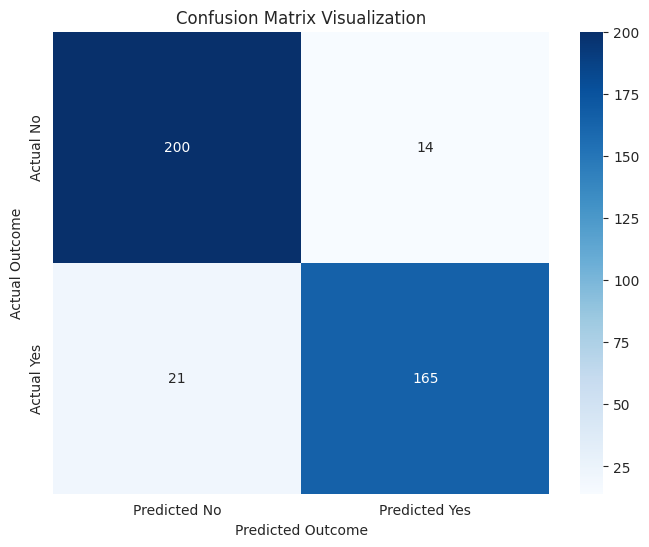

In [29]:
# 📊 Cell 6: Model Evaluation

# Make predictions on the test data
y_pred = model_v3.predict(X_test_scaled)

# Print accuracy and a detailed classification report
print("--- Model Evaluation (V3) ---")
print(f"Model Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%\n")

print("Classification Report:")
print(classification_report(y_test, y_pred))

# Display the confusion matrix to visualize performance
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted No', 'Predicted Yes'],
            yticklabels=['Actual No', 'Actual Yes'])
plt.xlabel('Predicted Outcome')
plt.ylabel('Actual Outcome')
plt.title('Confusion Matrix Visualization')
plt.show()


In [30]:
# 🎮 Cell 7: The "Abhin Simulator" V3

# --- YOUR TURN: Fill in your stats for the V3 model! ---
your_current_stats_v3 = {
    'events_attended': 15,
    'reply_rate': 0.4,
    'dept_similarity_index': 1,
    'friend_zone_flag': 0,
    'crush_eye_contact_count': 2,
    'communication_skill_score': 7,
    'personal_grooming_score': 8,
    'semester_cgpa': 8.71,
    'hackathon_participation_count': 5,
    'other_competition_wins': 4,
    'avg_dm_conversations_per_week': 3,
    'provides_academic_help': 1,
    'target_is_single': 1,  # Try changing this to 0 and see the result!
    'local_competition_score': 3
}

# --- Prediction Function ---
def predict_my_chances_v3(my_stats, model, scaler, feature_columns):
    input_df = pd.DataFrame([my_stats])
    input_df = input_df[feature_columns] # Ensures columns are in the correct order
    input_scaled = scaler.transform(input_df)
    prediction = model.predict(input_scaled)
    proba = model.predict_proba(input_scaled)
    result_text = "YES! The model predicts a favorable outcome." if prediction[0] == 1 else "Not yet. The model sees significant obstacles."

    print("\n" + "="*40)
    print("      YOUR PERSONALIZED PREDICTION (V3)")
    print("="*40)
    print(f"Result: {result_text}")
    print(f"Probability [No, Yes]: [{proba[0][0]:.2f}, {proba[0][1]:.2f}]")
    print("="*40)

# --- Run the Simulator ---
predict_my_chances_v3(your_current_stats_v3, model_v3, scaler, X.columns)



      YOUR PERSONALIZED PREDICTION (V3)
Result: YES! The model predicts a favorable outcome.
Probability [No, Yes]: [0.00, 1.00]



--- Generating V3 Feature Correlation Heatmap ---


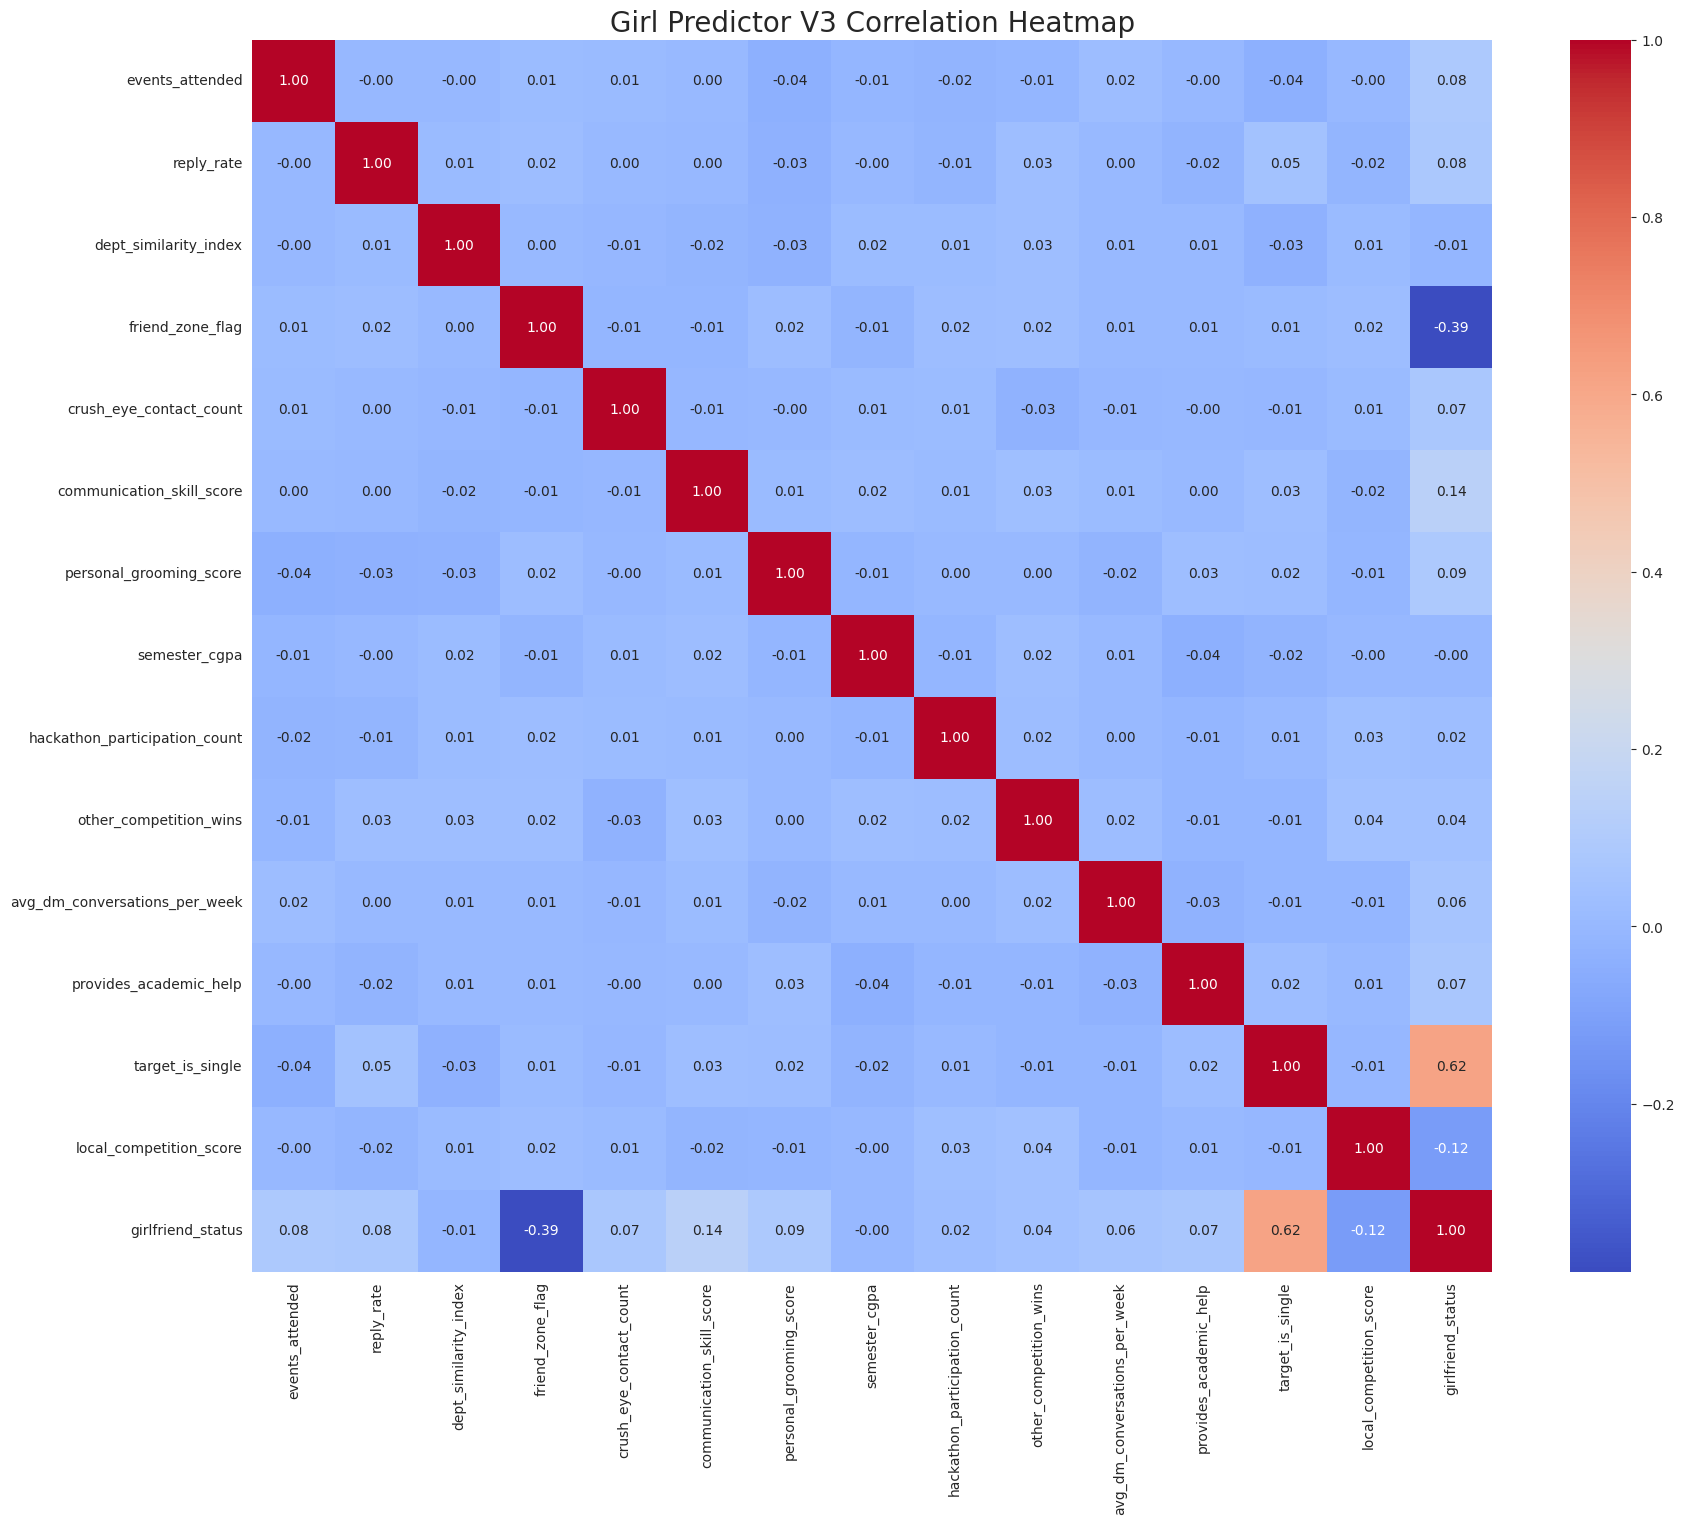

In [32]:
# 🔍 Cell 8: Exploratory Data Analysis (EDA) for V3

print("\n--- Generating V3 Feature Correlation Heatmap ---")

plt.figure(figsize=(20, 16))
sns.heatmap(df_v3.corr(), annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Girl Predictor V3 Correlation Heatmap', fontsize=20)
plt.show()


Generating a combined visualization for the V3 model...

Successfully saved the V3 summary plot as: 'project_summary_v3.png'
You can now download this file from the Colab file explorer and add it to your GitHub repo.


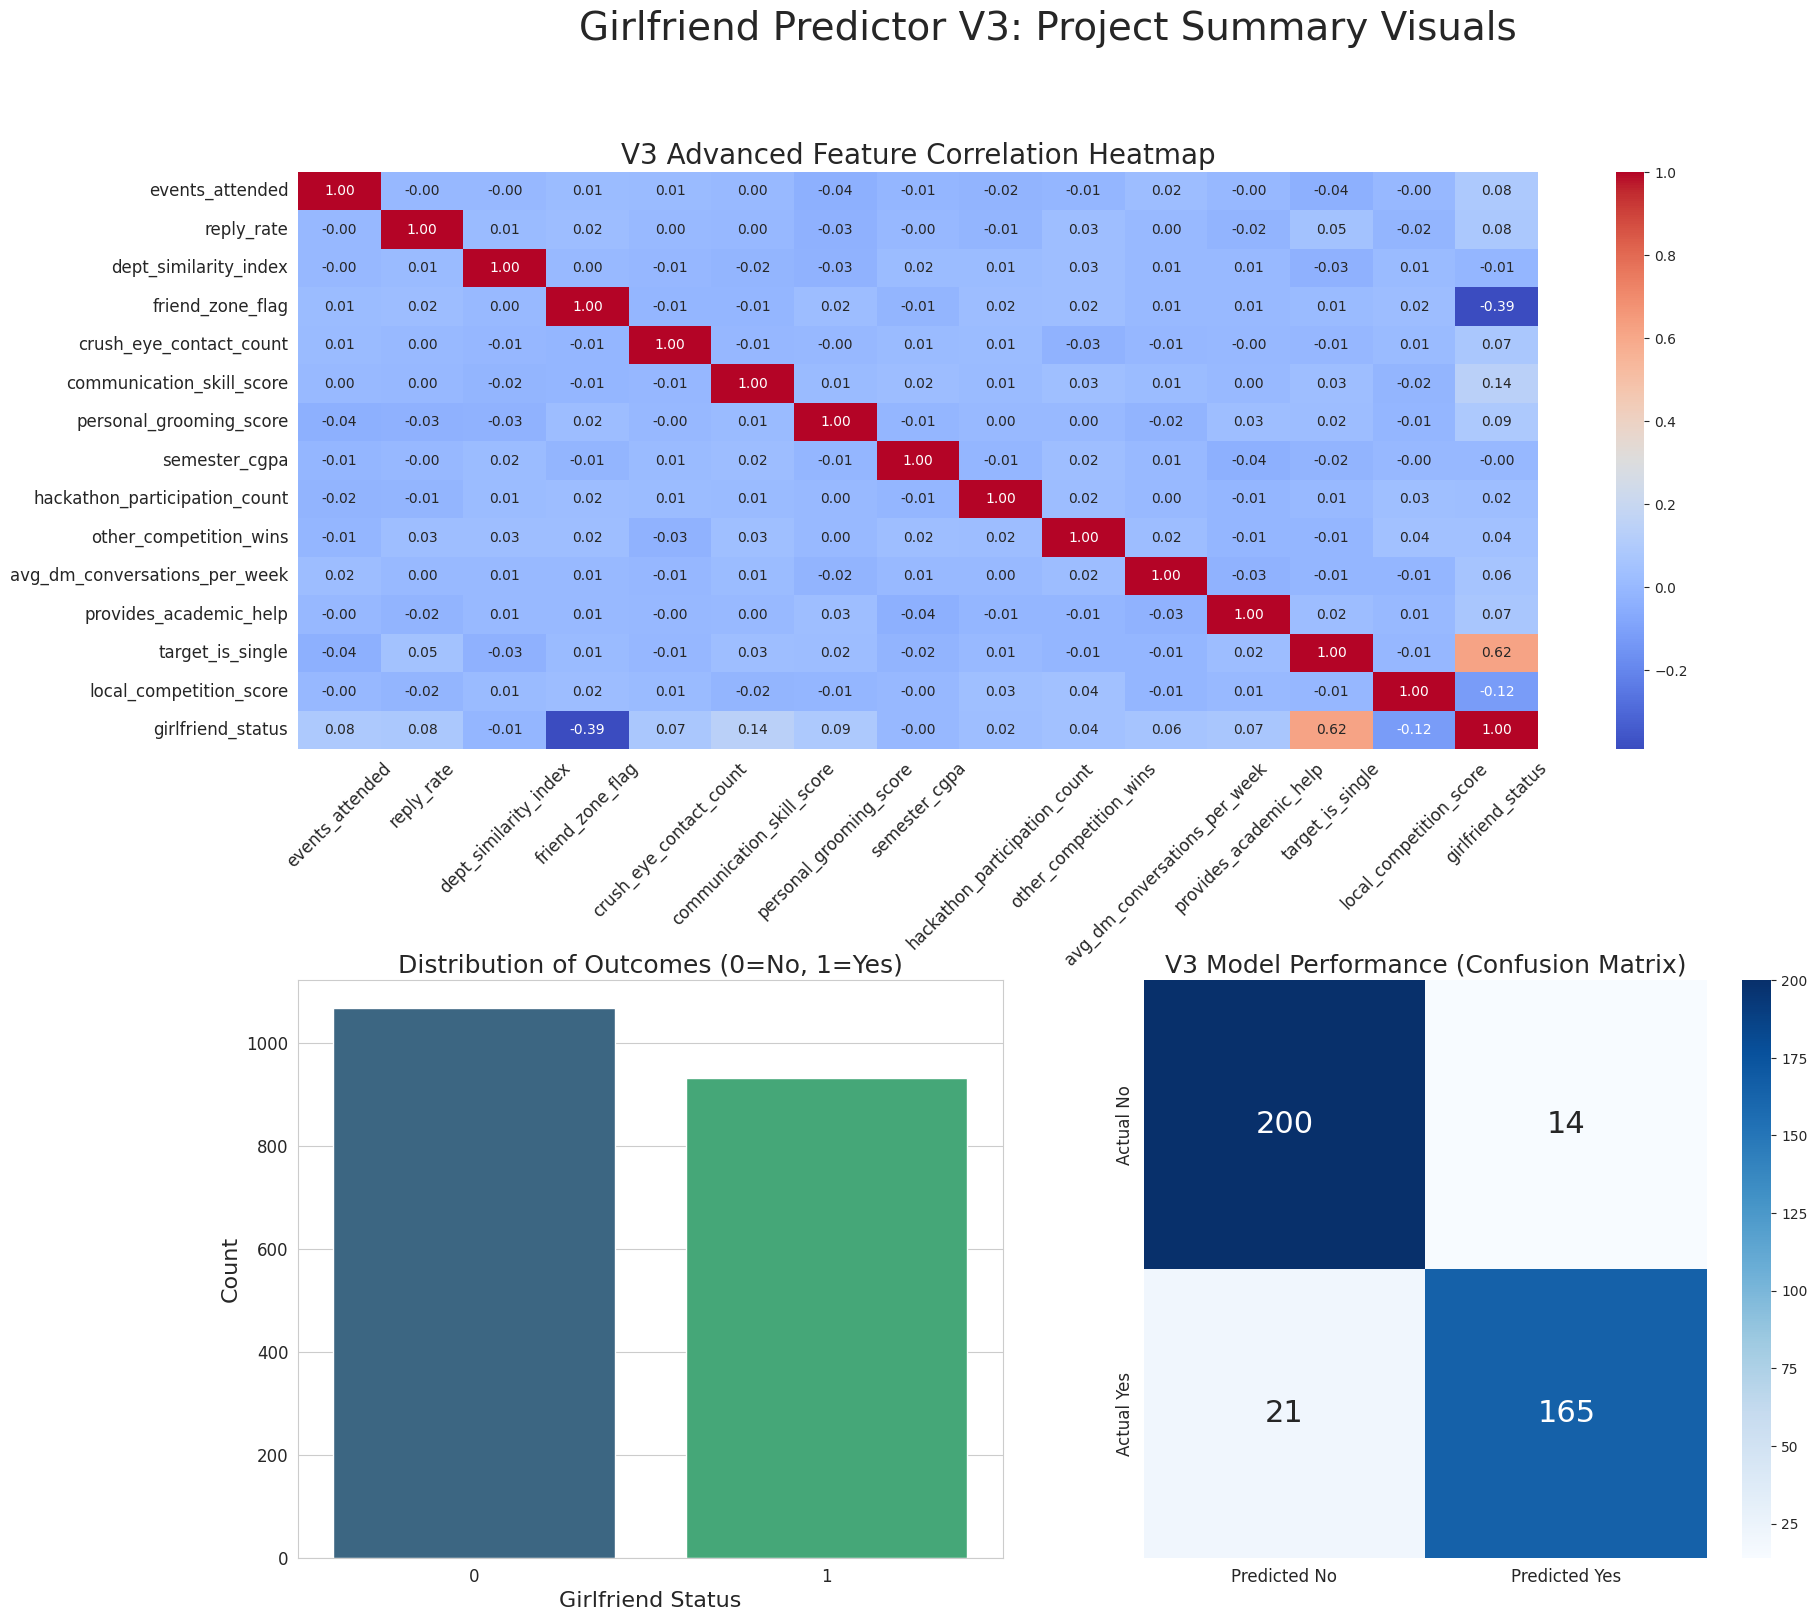

In [34]:
# ==============================================================================
#  Code to Combine All V3 Plots into a Single Summary Figure
# ==============================================================================

print("Generating a combined visualization for the V3 model...")

# Import GridSpec for a more flexible and robust layout
from matplotlib.gridspec import GridSpec

# --- 1. Create the Main Figure and Grid ---
# We create a figure with a specific size to ensure clarity
fig = plt.figure(figsize=(20, 18))

# Define a 2-row, 2-column grid. We'll make the top plot span both columns.
# Increased hspace to add more vertical space between the top and bottom rows.
gs = GridSpec(2, 2, figure=fig, hspace=0.4)

# Add subplots to the grid layout
ax_heatmap = fig.add_subplot(gs[0, :])  # Top row, all columns
ax_dist = fig.add_subplot(gs[1, 0])     # Bottom row, first column
ax_cm = fig.add_subplot(gs[1, 1])      # Bottom row, second column

# Add a main title for the entire figure, with adjusted padding (y=0.97)
fig.suptitle('Girlfriend Predictor V3: Project Summary Visuals', fontsize=28, y=0.97)


# --- 2. Plotting the Visualizations ---

# Plot 1: V3 Feature Correlation Heatmap (Top)
# This uses the df_v3 DataFrame from the data generation cell
sns.heatmap(df_v3.corr(), annot=True, cmap='coolwarm', fmt=".2f", ax=ax_heatmap, annot_kws={"size": 10})
ax_heatmap.set_title('V3 Advanced Feature Correlation Heatmap', fontsize=20)
ax_heatmap.tick_params(axis='x', rotation=45, labelsize=12) # Rotate labels for readability
ax_heatmap.tick_params(axis='y', rotation=0, labelsize=12)


# Plot 2: Target Variable Distribution (Bottom Left)
sns.countplot(x='girlfriend_status', data=df_v3, ax=ax_dist, palette="viridis")
ax_dist.set_title('Distribution of Outcomes (0=No, 1=Yes)', fontsize=18)
ax_dist.set_xlabel("Girlfriend Status", fontsize=16)
ax_dist.set_ylabel("Count", fontsize=16)
ax_dist.tick_params(axis='both', labelsize=12)


# Plot 3: V3 Model Confusion Matrix (Bottom Right)
# This uses y_test and y_pred from the model evaluation cell
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax_cm,
            xticklabels=['Predicted No', 'Predicted Yes'],
            yticklabels=['Actual No', 'Actual Yes'],
            annot_kws={"size": 22}) # Larger numbers for clarity
ax_cm.set_title('V3 Model Performance (Confusion Matrix)', fontsize=18)
ax_cm.tick_params(axis='both', labelsize=12)


# --- 3. Save the Figure and Display ---

# Save the combined figure to a high-resolution file
output_filename = 'project_summary_v3.png'
# Using bbox_inches='tight' helps to remove extra white space around the figure
plt.savefig(output_filename, dpi=300, bbox_inches='tight')

print(f"\nSuccessfully saved the V3 summary plot as: '{output_filename}'")
print("You can now download this file from the Colab file explorer and add it to your GitHub repo.")

# Display the final combined plot
plt.show()
